## Contents <a id='top'></a>

1. <a href='#Background'>Background</a>
1. <a href='#Analysis'>Analysis</a>
1. <a href='#Setup'>Setup</a>
1. <a href='#Decade-1'>Decade 1</a>
1. <a href='#Decade-2'>Decade 2</a>
1. <a href='#Decade-3'>Decade 3</a>
1. <a href='#Decade-3-[Continued]'>Decade 3 [Continued]</a>
1. <a href='#Winning-Strategy'>Winning Strategy</a>
1. <a href='#Additional-Consideration'>Additional Consideration</a>
1. <a href='#Our-Challenges'>Our Challenges</a>

Contributors: Ai Xia, Jie Sheng, Silas & Varden

# Background
<a href=#top>(back to top)</a>

<h3> A Decision Making Game </h3>

At its core, Decisions for a Decade is a game designed to explore the challenges of long-term investments under uncertainty. It pits teams of players against each other under a set of rules and their resulting score determines the victor.

<h3> Rules </h3>

A full game round is split into 3 decades, with players only have 3 opportunities for input: once at the start of each decade.

Players will decide their 10-year investment plan at the beginning of each round/ decade, each time allocating a total of __10 Stones__ to 3 different categories: *Flood Insurance*, *Drought Insurance*, and *Investments*.

After each decision making round, the game proceeds with the following 10 years being randomly selected (via a dice roll or otherwise), the options being a *Flood*, *Drought*, or *Safe* year.

When a *Flood* or *Drought* occurs, a stone allocated to the corresponding insurance is removed. And if no stone remains when a disaster strikes, a crisis is deemed to have occured and all the *Investment* stones are wiped out.

At the end of each round, the number of *Investment* stones is translated to a players prosperity score, and everything repeats for the next decade.

<h3> Objective </h3>

The players are given the Drought and Flood probabilities at the start of each decade, save for the last one. Therefore, we know that there is an optimal way to allocate our resources.

We will ignore the game elements and simulate just the core game engine, iterating through all possible player inputs and find the statistically superior one. That way, we will be able to justify our in-game choices.

# Analysis
<a href=#top>(back to top)</a>

<h3> Best method </h3>

We will look at one decade at a time and determine the optimal strategy for that decade. The best method to win the game will be to employ the optimal strategy for the respective decades.

<h3> All strategies </h3>

To obtain all the strategies, we split the 10 stones into 3 non-identical bins—Drought insurance, Flood insurance and investment. From there we obtain a total of 66 strategies.

<h3> Optimal strategy </h3>

The strategy with the highest score will be termed the optimal strategy.

<h3> Scoring </h3>

If a strategy has more or equal drought and flood insurance than the drought and flood occurence, then they will receive a score equal to that of their investment. Else, they will get 0.

<h3> Simulation </h3>

We will use simpy to do our simulation. Each decade will be simulated 10,000 times. In a single simulation, we will generate 10 events, 1 for each year.

For example, for a single simulation of decade 1. We will input `[1/6, 1/6, 4/6]` as the pmf for drought, flood and safe respectively. Using `np.random.choice`, we will get an output like this `['Flood', 'Safe', 'Safe', 'Drought', 'Flood', 'Drought', 'Flood', 'Safe', 'Flood', 'Drought']`. Using this result, we will score each strategy. Then, repeat this 10,000 times and accumulate the scores for each strategy. Each time, when we call `np.random.choice`, a different output will be obtained. Finally, we can obtain the optimal strategy for that decade.

This is done using `one_decade` where the input pmf and the number of simulations can be specified.

<h3> Simpy </h3>

After each simulation, we will do `env.timeout(1)`, to keep stay consistent with simpy's api. We did not opt to do `env.timeout(1)` after a single year because this will make our code more complicated and it does not improve our analysis process.

# Setup
<a href=#top>(back to top)</a>

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import simpy

from all_functions import *

# Decade 1
<a href=#top>(back to top)</a>

In the first round, the probabilities of a drought and flood occuring are determined by rolling a 6 sided dice, with 1 = drought, and 6 = flood.

In [3]:
env_pmf = np.array([1/6, 1/6, 4/6])
log1 = {}

env = simpy.Environment()
env.process(one_decade(env, env_pmf, log=log1, verbose=True))
env.run()

Total: 100,000
Droughts: 16,574, Floods: 16,517, Safe: 66,909


Now that our simulation is complete, we will manipulate the data we've obtained to get some interesting results.

In [4]:
df1 = pd.DataFrame(log1)

print_top_players(df1)

Rank  1: ( 3,  2,  5) | Total Prosperity: 36030.00, Average Prosperity: 3.60
Rank  2: ( 2,  3,  5) | Total Prosperity: 35985.00, Average Prosperity: 3.60
Rank  3: ( 2,  2,  6) | Total Prosperity: 35400.00, Average Prosperity: 3.54
Rank  4: ( 3,  3,  4) | Total Prosperity: 34756.00, Average Prosperity: 3.48
Rank  5: ( 2,  4,  4) | Total Prosperity: 30720.00, Average Prosperity: 3.07

(i, j , k) -> (Drought insurance, Flood Insurance, Investment)


As we can see in the table above, there are two strategies that are at the top: (3,2,5) and (2,3,5). This makes sense, since P(Drought) = P(Flood).

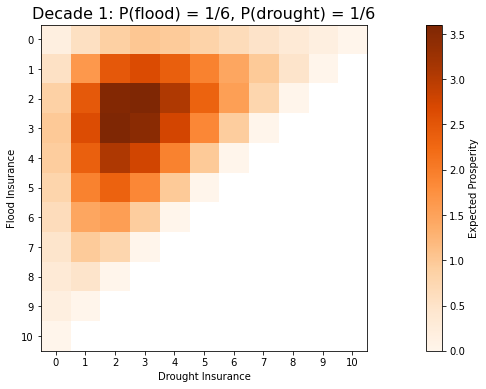

In [5]:
quick_plot(df1, 'Decade 1: P(flood) = 1/6, P(drought) = 1/6')

As illustrated in the heatmap above, the two darkest regions correspond to our results from earlier.

# Decade 2
<a href=#top>(back to top)</a>

In the second round, the chances are represented by an 8 sided dice roll, with 1 corresponding to a drought and 6,7,8 to a flood.

In [6]:
env_pmf = np.array([1/8, 3/8, 4/8])
log2 = {}

env = simpy.Environment()
env.process(one_decade(env, env_pmf, log=log2, verbose=True))
env.run()

Total: 100,000
Droughts: 12,475, Floods: 37,396, Safe: 50,129


Again, we will check for the best performing strategies

In [7]:
df2 = pd.DataFrame(log2)

print_top_players(df2)

Rank  1: ( 2,  4,  4) | Total Prosperity: 23460.00, Average Prosperity: 2.35
Rank  2: ( 2,  5,  3) | Total Prosperity: 22686.00, Average Prosperity: 2.27
Rank  3: ( 1,  5,  4) | Total Prosperity: 21040.00, Average Prosperity: 2.10
Rank  4: ( 3,  4,  3) | Total Prosperity: 19983.00, Average Prosperity: 2.00
Rank  5: ( 1,  4,  5) | Total Prosperity: 19800.00, Average Prosperity: 1.98

(i, j , k) -> (Drought insurance, Flood Insurance, Investment)


This time, our winning strategy is clear.

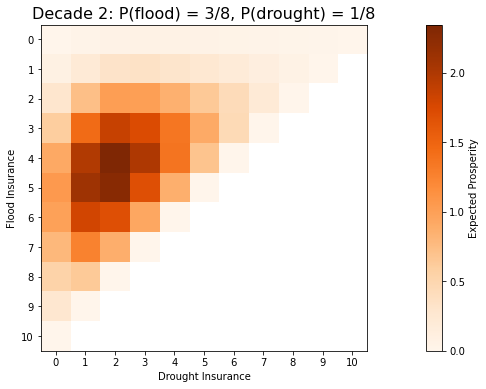

In [8]:
quick_plot(df2, 'Decade 2: P(flood) = 3/8, P(drought) = 1/8' )

# Decade 3
<a href=#top>(back to top)</a>

The last decade is meant to represent extreme uncertainty. The probabilities are not given. Therefore, we will let `env_pmf` default to `None` and randomly assign the probabilities to simulate that.

This also means we get a different result every time we run the simulation.

In [9]:
log3 = {}

env = simpy.Environment()
env.process(one_decade(env, log=log3, verbose=True))
env.run()

Total: 100,000
Droughts: 49,020, Floods: 31,212, Safe: 19,768


In [10]:
df3 = pd.DataFrame(log3)

print_top_players(df3)

Rank  1: ( 5,  3,  2) | Total Prosperity: 5846.00, Average Prosperity: 0.58
Rank  2: ( 4,  4,  2) | Total Prosperity: 5022.00, Average Prosperity: 0.50
Rank  3: ( 5,  4,  1) | Total Prosperity: 4721.00, Average Prosperity: 0.47
Rank  4: ( 6,  3,  1) | Total Prosperity: 4676.00, Average Prosperity: 0.47
Rank  5: ( 6,  2,  2) | Total Prosperity: 4322.00, Average Prosperity: 0.43

(i, j , k) -> (Drought insurance, Flood Insurance, Investment)


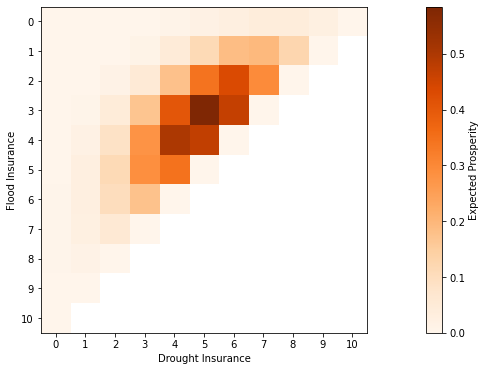

In [11]:
quick_plot(df3)

In decade 3, pmf is randomly generated. The above example represents only one randomly generated pmf. Now we will generate 5 additional random pmf to determine if there is a certain strategy that does consistently well.

In [12]:
combined = [log3]

for i in range(5):
    temp_log = {}

    env = simpy.Environment()
    env.process(one_decade(env, log=temp_log))
    env.run()
    combined.append(temp_log)

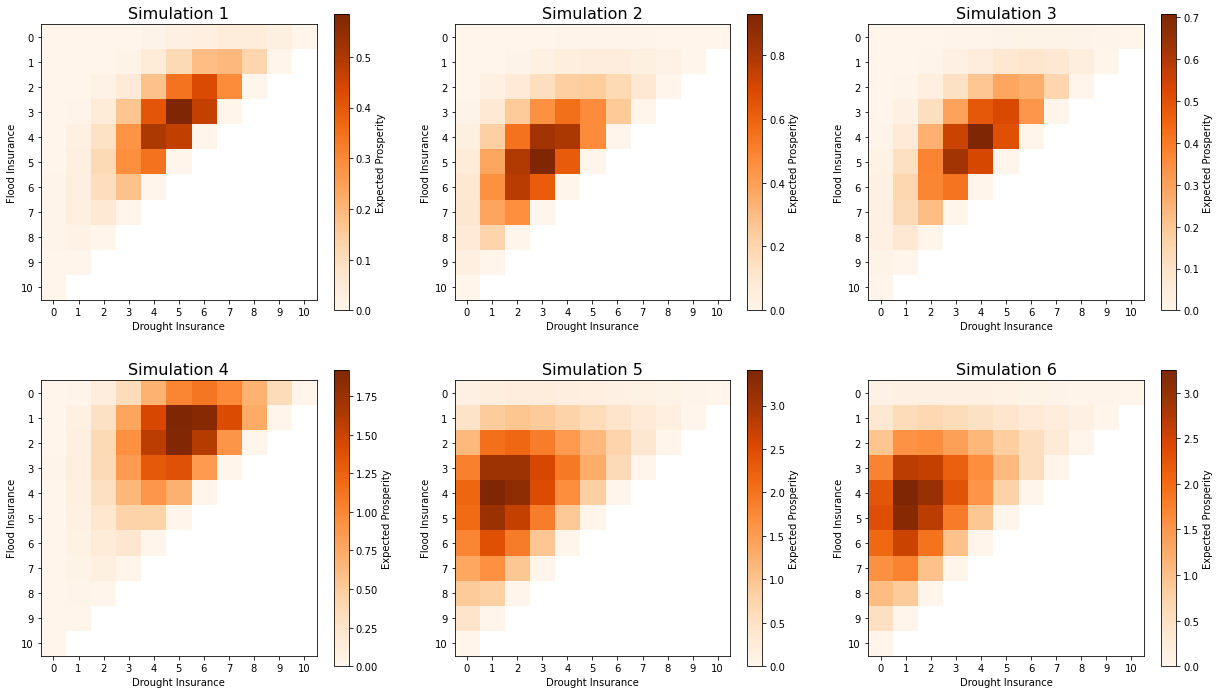

In [13]:
t = ['Simulation 1', 'Simulation 2', 'Simulation 3', 'Simulation 4', 'Simulation 5', 'Simulation 6']
combined_df = list(map(lambda x: pd.DataFrame(x), combined))

quick_plot(combined_df, titles=t, max_row=3)

As expected, because we have simply assigned random probabilities, the optimal solutions we get are completely random too.

# Decade 3 [Continued]
<a href=#top>(back to top)</a>

We will try to simulate 1000 random pmf and see if we are able to obtain an optimal strategy to deal with uncertainty. Each pmf will be ran 1000 times.

*Running this entire portion will take quite some time. We are generating 66 million rows*

In [14]:
result = []
for i in range(1000):
    if i % 100 == 0:
        print(f'Simulating {i}')
    inner_log = {}
    env = simpy.Environment()
    env.process(one_decade(env, num_sim=1000, log=inner_log, verbose=False))
    env.run()
    result.append(inner_log)

Simulating 0
Simulating 100
Simulating 200
Simulating 300
Simulating 400
Simulating 500
Simulating 600
Simulating 700
Simulating 800
Simulating 900


In [15]:
temp = list(map(lambda x: pd.DataFrame(x), result))
combined = pd.concat(temp, ignore_index=True)

In [16]:
print_top_players(combined)

Rank  1: ( 3,  3,  4) | Total Prosperity: 951128.00, Average Prosperity: 0.95
Rank  2: ( 3,  4,  3) | Total Prosperity: 900696.00, Average Prosperity: 0.90
Rank  3: ( 4,  3,  3) | Total Prosperity: 898542.00, Average Prosperity: 0.90
Rank  4: ( 2,  4,  4) | Total Prosperity: 891544.00, Average Prosperity: 0.89
Rank  5: ( 4,  2,  4) | Total Prosperity: 886644.00, Average Prosperity: 0.89

(i, j , k) -> (Drought insurance, Flood Insurance, Investment)


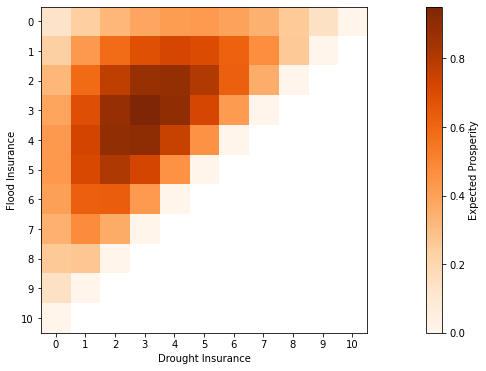

In [17]:
quick_plot(combined)

From here we can identify that on average, putting 3 stones into drought and flood insurance respectively and 4 stones into investment is the optimal solution to deal with random probabilities.

*We made a mistake in our video where we recommended the strategy (4, 4, 2)*

In [18]:
combined[['Drought' , 'Flood', 'Safe']].mean()

Drought    3.293820
Flood      3.408511
Safe       3.297669
dtype: float64

From the simulation of 1000 random pmf, we can see that the probabilty of Drought, Flood and Safe converges to about 1/3 each. 

# Winning Strategy
<a href=#top>(back to top)</a>

From our analysis, the winning strategy for the game will be `( 3,  2,  5)`,  `( 2,  4,  4)`, `( 3,  3,  4)` for decade 1, 2 and 3 respectively.

The winning strategy is arranged in the following order: Drought insurance, flood insurance and investment

# Additional Consideration
<a href=#top>(back to top)</a>

We have explored the game's simplistic representation of a real world problem; that of long-term decision planning in the face of seemingly unpredictable natural disasters. Granted, no model is perfect, however there are some simple steps we can take to get an even more sophisticated simulation.

<h2> Damages </h2>

In the real world, no two flood and droughts are the same. Similarly, the damages that the host nation incur vary as well. In our model, we will simulate the damage with a exponential probability distribution.

<h2> Investments </h2>

Likewise, the returns of an investment is not fixed, and there are always risks involved. In our model, we will simulate the returns with a normal probability distribution. The investment will be compounded over a period of ten years. It is to note that, annual return will not always be positive

This is a naive implementation of that investment risk, which while not sophisticated enough to capture the complexity of the real world economy, should suffice to illustrate how it might affect our results.

Applying this to our very first simulation of the second decade, we see the following:

In [19]:
mmm_df = account_dmg_investment(df2, 3, 3, 1.1)

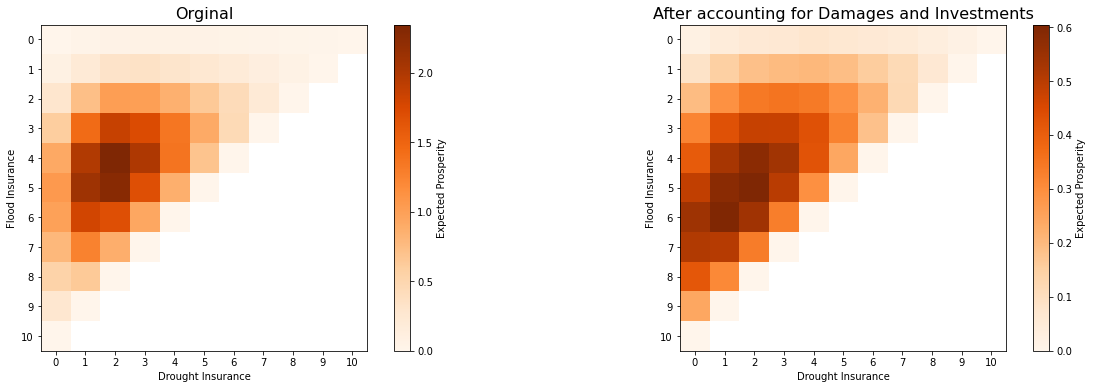

In [20]:
t = ['Orginal', 'After accounting for Damages and Investments']

quick_plot([df2, mmm_df], titles=t)

As we can see, although the optimal solution remains about the same, the viability of the surrounding strategies have increased as a result. This is because the crisis damages dont immediately overwhelm the allocated insurance, and the value of investments have improved due the cumulative growth, which punishes a more aggressive investment allocation.


We will now analyse how damages and investment affects the optimal strategy.


*Low damages*

In [21]:
# Low returns, on average each investment produces a return of 90% aka a loss of 10%.
lll_df = account_dmg_investment(df2, 1, 1, 0.9)

# Moderate returns
llm_df = account_dmg_investment(df2, 1, 1, 1.1)

# High returns
llh_df = account_dmg_investment(df2, 1, 1, 5)

*Moderate damages*

In [22]:
# Low returns
mml_df = account_dmg_investment(df2, 3, 3, 0.9)

# High returns
mmh_df = account_dmg_investment(df2, 3, 3, 5)

*High damages*

In [23]:
# Low returns
hhl_df = account_dmg_investment(df2, 7, 7, 0.9)

# Moderate returns
hhm_df = account_dmg_investment(df2, 7, 7, 1.1)

# High returns
hhh_df = account_dmg_investment(df2, 7, 7, 5)

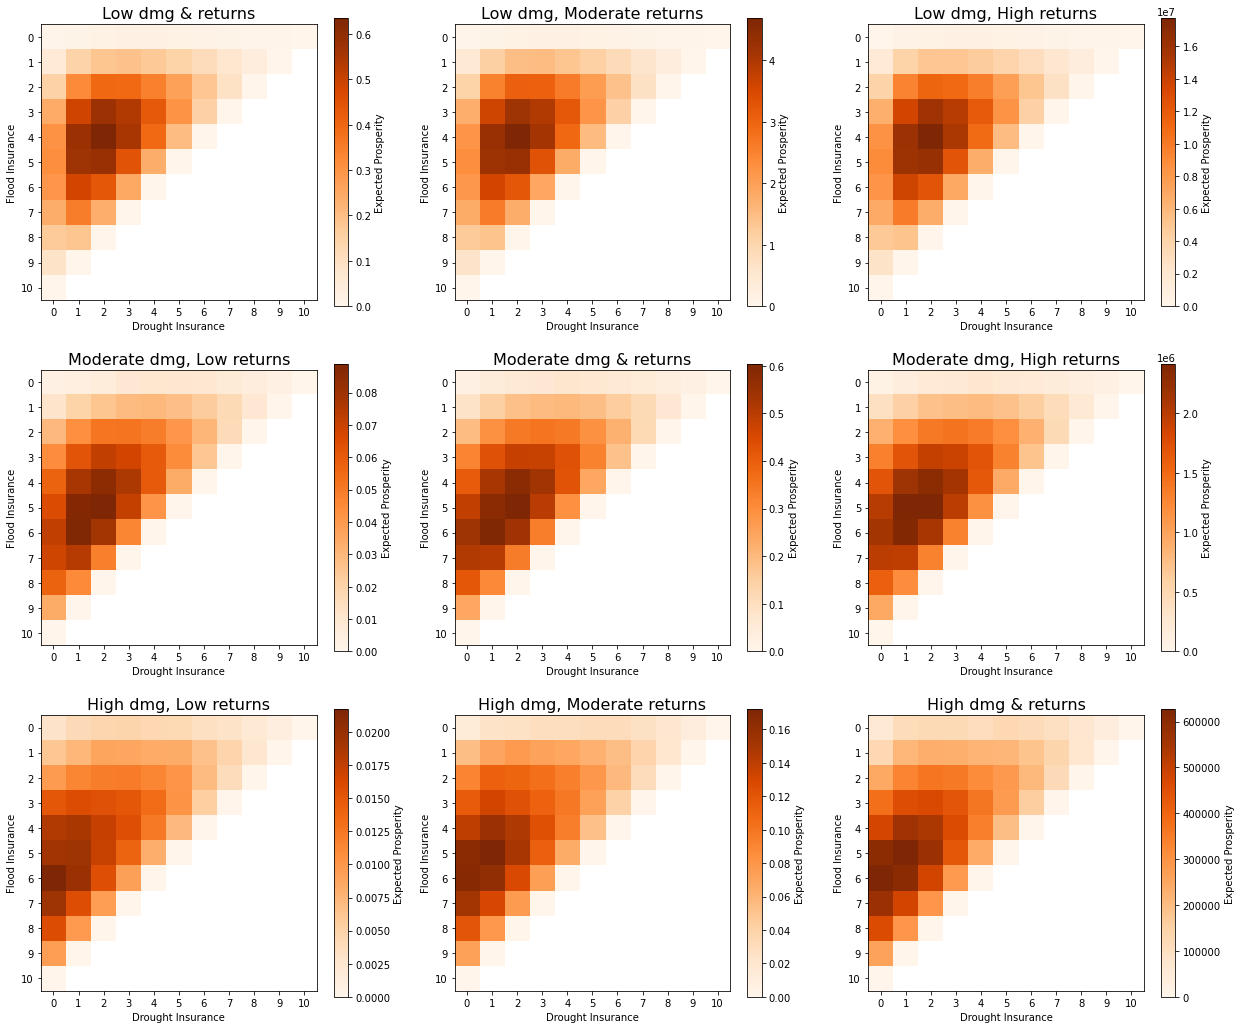

In [24]:
t = ['Low dmg & returns', 'Low dmg, Moderate returns', 'Low dmg, High returns',
     'Moderate dmg, Low returns', 'Moderate dmg & returns', 'Moderate dmg, High returns',
     'High dmg, Low returns', 'High dmg, Moderate returns', 'High dmg & returns']

all_df = [lll_df, llm_df, llh_df,
          mml_df, mmm_df, mmh_df,
          hhl_df, hhm_df, hhh_df]


quick_plot(all_df, titles=t, max_row=3)

As observed, changing the returns does not change the optimal strategy at all. This is expected because of the way our prosperity score is calculated. Returns only affect prosperity scores.

On the other hand, changing damages affects the optimal strategy. As expected, when damages increase, the optimal strategy shift to a more defensive one. 

*It should be note that this is for decade 2 where probability for drought, flood and safe is 1/8, 3/8, 4/8 respectively*

# Our Challenges
<a href=#top>(back to top)</a>

<h3> Problem 1: Not understanding the problem </h3>

Initially, we wanted to model the simulation after real world data—actual drought and flood probabilities and actual decision makers. Thorugh the simulation, we wanted to find which type of decision makers has the highest probabilities to perform well.

Hence, we made a simulation model that tries to do that. For the drought and flood probabilities, there were too many variabilities because of geographical factors, so we decided to randomize the probabilities and determine the decision maker that can perform well in any scenario.

For the decision maker, we randomized some biases in them. These biases will affect how they make their decision to split the stones. Through the simulation, we wanted to find the set of biases that will allow decision makers to perform well.

After running the simulation and doing some analysis on it, we realized that we were supposed to maximize the score in the game rather than finding a decision maker that will perform well in a ‘real-world’ context.
We scrapped the entire simulation and instead broke it down into one decade at a time. In the simulation, we will pass in all possible ways to split the stones and find the arrangement of stones that gave the best score. That will be the optimal strategy for that decade. We will run this simulation for the other 2 decades. From here, the best strategy to play the game will be the combination of the 3 optimal strategies to split the stones in the respective decades.

<h3> Problem 2: Determining the probability of the cone toss </h3>

It is difficult to visualize or formulate the probability mass function (PMF) of a cone. Hence, one obvious solution was to go about tossing the cone and formulate the PMF from there. However, we think that is not the point that the game wanted participants to understand. The game wanted to help participants understand how they make decisions under uncertainty.

Based on this idea of uncertainty, we will randomly initialize a set of random PMF for the cone toss. Then determine which strategy will be the best to deal with this uncertainty.

<h3> Problem 3: Recommending the best strategy for the game </h3>

For decade 1 and 2, the probabilities are based on a six- and eight-sided die, respectively. Hence it is easy to understand the result of the simulation and recommend the optimal strategy for the respective decade.
However, for the last decade, as the probabilities are randomly initialized, it seemed any strategy has an equal chance to win for a single game. But we found that in the long run, the probabilities will converge to 1/3 each which do not seem random after all.

We decided to recommend the optimal strategy that will do will in the long run.

<h3> Problem 4: Limitation of our model </h3>

We are only capable of generating pseudorandom numbers that cannot mimic real-world randomness. Additionally, even if we can generate a truly random PMF, studying it does not provide us with much useful information. Perhaps it could be more prudent to try to create a model that includes the multitude of factors that influence flood or drought risks in the real world. In addition, we did not account for the dependence of flood and drought. However, for the purposes of modelling the game, this function suffices.

Another additional limitation is that in decade 3, probabilities will converge to 1/3 and not completely uncertain. This is something we are unable to overcome due to the way we generate our random pmf.

<h3> Problem 5: Damages and gains </h3>

In our initial model, we treated stones as years. By placing 3 stones into flood insurance, we are predicting 3 years of flood.
However, this is too simplistic. Hence, we decided to treat stones as money instead. By placing 3 stones into flood insurance, we are effectively investing 3 ‘dollars’ into flood protection.

This allows us to analyze the game in a different way. Now, rather than determining the flood and drought occurrences only. We can map each flood or drought to some function to obtain its damages caused. In the rare case that the damages caused cost more than 10 ‘dollars’ then every strategy is ineffective.

In addition, we will be able to map investment gains. Placing 3 ‘dollars’ into investment will allow it to be compounded over a period of 10 years. However, it should not be expected that every year will net a positive interest.

By having damages and gains, we can complicate the game further. 
